In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kernel001(x1, x2, a, b):
    return np.sum(a * np.exp(-(x1-x2)**2 / b))

In [3]:
def kernel002(x1, x2, a):
    return np.sum(a / (1 + (x1-x2)**2))

In [4]:
def kernel003(x1, x2, a):
    return  a * np.sum(x1 * x2)

In [14]:
def make_kernel(k, *params):
    return lambda x1, x2: k(x1, x2, *params)

## Learning Phase

In [51]:
N = 10
theta1 = 5
theta2 = 10
theta3 = 10
x_pre = np.linspace(2, 8, N) + (np.random.random(N) - 0.5) * 0.1
y_pre = 1.5 * x_pre - 5 + np.random.normal(0, 1, N) 
y_pre = y_pre - y_pre.sum() / y_pre.size
x_pre = np.vstack((np.ones(N), x_pre))


In [52]:
x_pre.shape

(2, 10)

(0.0, 10.0)

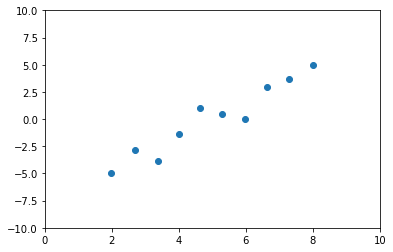

In [54]:
plt.scatter(x_pre[1], y_pre)
plt.ylim(-10, 10)
plt.xlim(0, 10)

In [83]:
k = make_kernel(kernel003, theta2)

In [84]:
K_pre = np.array([[k(np.array(x1), np.array(x2)) for x1 in x_pre.T] for x2 in x_pre.T])
K_pre = theta1 * np.identity(N) + K_pre
K_pre.shape

(10, 10)

In [85]:
np.linalg.det(K_pre)

19885392393.25047

## Fitting Phase

In [86]:
x = np.linspace(0, 10, 100)
x = np.vstack((np.ones(x.size), x))

In [87]:
K_post = np.array([[k(x1, x2) for x1 in x.T] for x2 in x.T])
K_post.shape

(100, 100)

In [88]:
k_post = np.array([[k(x1, x2) for x1 in x.T] for x2 in x_pre.T])
K_post.shape

(100, 100)

In [89]:
K_pre_inv = np.linalg.inv(K_pre)

In [90]:
C = K_post - k_post.T @ K_pre_inv @ k_post

In [91]:
mu = k_post.T @ K_pre_inv @ y_pre

(-10.0, 10.0)

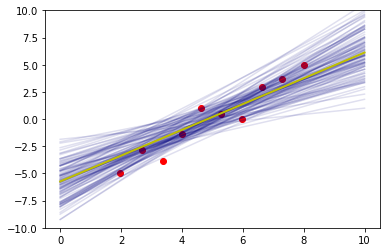

In [92]:
data = pd.DataFrame()
for i in range(100):
    y = np.random.multivariate_normal(mu, C)
    plt.plot(x[1], y, color='#00008020')
    data[i] = y
plt.plot(x[1], data.mean(axis=1), color='y', linewidth=2)
plt.scatter(x_pre[1], y_pre, color='red')
plt.ylim(-10, 10)